In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [5]:
dataset_path = os.path.join('dataset', 'word_embeddings_dataframe.pkl')
df = pd.read_pickle(dataset_path) 
df.head()

,File_Name,Text,Image_Path,BERT_Embeddings
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09..."
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1..."
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1..."
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02..."
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0..."


In [6]:
# Function to modify image path
def modify_image_path(image_path):
    filename = os.path.basename(image_path).split("floorplan_image\\")[1]
    new_path = os.path.join("human_annotated_images", filename)
    return new_path

# Apply the function to the 'Image_Path' column in the DataFrame
df['Modified_Image_Path'] = df['Image_Path'].apply(modify_image_path)

df.head()

,File_Name,Text,Image_Path,BERT_Embeddings,Modified_Image_Path
0,10017,"The balcony juts out on the south side, with t...",../floorplan_image\10017.png,"[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,../floorplan_image\10042.png,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...",../floorplan_image\10045.png,"[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...",../floorplan_image\10047.png,"[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,../floorplan_image\10052.png,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


In [7]:
df.drop(['Image_Path'], axis = 1, inplace = True)

In [8]:
# removed image path folder
df.rename(columns = {'Modified_Image_Path':'Image_Path'}, inplace = True)
df.head()

,File_Name,Text,BERT_Embeddings,Image_Path
0,10017,"The balcony juts out on the south side, with t...","[[-0.6216691, -0.029034398, 0.045137372, -0.09...",human_annotated_images/10017.png
1,10042,The balcony is in the southeastern corner of t...,"[[-0.6944888, 0.015425202, -0.0041255075, -0.1...",human_annotated_images/10042.png
2,10045,"bathroom is in north side of the house, next t...","[[-0.6030773, -0.0011889015, 0.045667697, -0.1...",human_annotated_images/10045.png
3,10047,"The balcony is in the north east corner, just ...","[[-0.69215715, -0.052971497, 0.03891414, -0.02...",human_annotated_images/10047.png
4,10052,The balcony is on the southwest side of the ap...,"[[-0.61126614, -0.005761562, -0.054692637, 0.0...",human_annotated_images/10052.png


# Printing an Image

In [9]:
# Printing Input Directories
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)

In [15]:
DIRECTORY = 'dataset' 

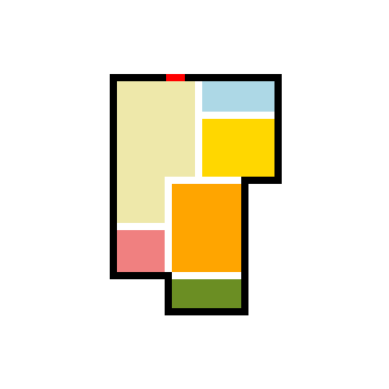

In [16]:
# Displaying an Image
import matplotlib.pyplot as plt
from PIL import Image

# Example image path
image_path = os.path.join(DIRECTORY, df['Image_Path'][0])

# Open the image
image = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')  # Hide axis
plt.show()

# Splitting Dataset into test and Train

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image

# Load BERT embeddings and image paths
X_text_embeddings = np.array(df['BERT_Embeddings'].tolist())
image_paths = df['Image_Path'].tolist()

# Load images
X_images = []
for path in image_paths:
    path = DIRECTORY + path
    image = Image.open(path)
    #onvert image to numpy array and normalize if needed
    image_array = np.array(image) / 255.0
    X_images.append(image_array)

# Convert lists to numpy arrays
X_text_embeddings = np.array(X_text_embeddings)
X_images = np.array(X_images)

# Reshape or normalize if required (already done in the provided code)

# Prepare target data (labels)
y = np.arange(len(df))  # Assuming each row corresponds to a unique label

# Split the data into training and testing sets
X_train_text, X_test_text, X_train_images, X_test_images, y_train, y_test = train_test_split(
    X_text_embeddings, X_images, y, test_size=0.2, random_state=42
)

# Display shapes of the data
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)
print("y_train shape:", y_train.shape)
print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)
print("y_test shape:", y_test.shape)


X_train_text shape: (3202, 1, 768)
X_train_images shape: (3202, 256, 256, 3)
y_train shape: (3202,)
X_test_text shape: (801, 1, 768)
X_test_images shape: (801, 256, 256, 3)
y_test shape: (801,)


In [10]:
# Reshape the text embeddings to remove the extra dimension
X_train_text = X_train_text.reshape(X_train_text.shape[0], -1)
X_test_text = X_test_text.reshape(X_test_text.shape[0], -1)

# Display shapes after reshaping
print("Reshaped X_train_text shape:", X_train_text.shape)
print("Reshaped X_test_text shape:", X_test_text.shape)


Reshaped X_train_text shape: (3202, 768)
Reshaped X_test_text shape: (801, 768)


In [11]:
# Display shapes of the data
print("X_train_text shape:", X_train_text.shape)
print("X_train_images shape:", X_train_images.shape)

print("X_test_text shape:", X_test_text.shape)
print("X_test_images shape:", X_test_images.shape)

X_train_text shape: (3202, 768)
X_train_images shape: (3202, 256, 256, 3)
X_test_text shape: (801, 768)
X_test_images shape: (801, 256, 256, 3)


In [12]:
# VERIFICATION
X_train_text[0]

array([-0.5754481 ,  0.0189473 ,  0.11817609,  0.02992155,  0.65141094,
       -0.20927459,  0.04845341,  0.5410135 ,  0.13207452, -0.63569915,
        0.207006  , -0.64307034, -0.38915625,  0.16688353, -0.30772436,
        0.46441597,  0.28175345,  0.20655034,  0.0714353 ,  0.34022012,
        0.05433815, -0.29941747, -0.17494744,  0.60304934,  0.12055178,
       -0.01095621, -0.02932324,  0.07023944, -0.19566831,  0.08874706,
        0.6439936 , -0.04744988, -0.00477395, -0.67380816,  0.15863612,
       -0.2338918 ,  0.19983698, -0.14235647, -0.5475427 ,  0.14933665,
       -0.7797225 , -0.18704425,  0.05365221,  0.08347022, -0.0300341 ,
       -0.18644734,  0.5152984 , -0.21001706, -0.21902874,  0.3655471 ,
       -0.48608094, -0.05752416, -0.14547814,  0.0989761 ,  0.33760992,
        0.8571075 , -0.378471  , -0.23348029, -0.4961075 , -0.46169376,
        0.4204655 , -0.18531236,  0.44366038, -0.50126475,  0.26569808,
       -0.03627625,  0.44500747,  0.5008911 , -0.41431153,  0.07

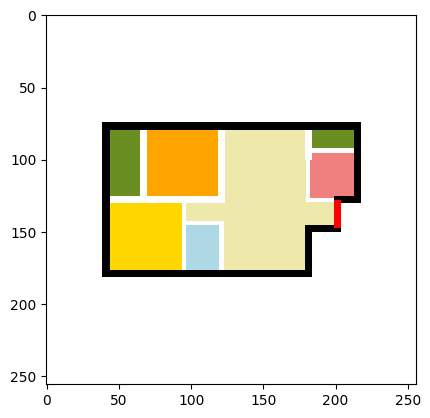

In [13]:
# displaying images
data = X_train_images[2]
from matplotlib import pyplot as plt
plt.imshow(data, interpolation='nearest')
plt.show()

In [14]:
# DO NOT RUN THIS , skip to next cell.
import cv2
resized_images = []

# Define the new dimensions
new_width = 64
new_height = 64

for image in X_train_images:
    resized_img = cv2.resize(image, (new_width, new_height))  
    resized_images.append(resized_img)

# Now, resized_images will contain your resized images ready for passing into GAN


In [15]:
X_train_images.shape

(3202, 256, 256, 3)

# Applying CGANs

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import tensorflow as tf

2024-09-25 16:27:11.616074: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-25 16:27:11.616256: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-25 16:27:11.762532: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Model

# Define Generator
def build_generator():
    input_text = layers.Input(shape=(768,))
    x = layers.Dense(256, activation='relu')(input_text)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Reshape((16, 16, 1))(x)
    
    input_noise = layers.Input(shape=(100,))
    y = layers.Dense(256 * 16 * 16, activation='relu')(input_noise)
    y = layers.Reshape((16, 16, 256))(y)
    
    concatenated = layers.Concatenate(axis=-1)([x, y])
    
    # Conv2DTranspose layers to progressively upsample to 256x256
    x = layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', activation='relu')(concatenated)  # 16x16 -> 32x32
    x = layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)              # 32x32 -> 64x64
    x = layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)              # 64x64 -> 128x128
    output = layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')(x)        # 128x128 -> 256x256
    
    model = Model(inputs=[input_text, input_noise], outputs=output)
    return model

# Define Discriminator
def build_discriminator():
    input_image = layers.Input(shape=(256, 256, 3))
    x = layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(input_image)
    x = layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=input_image, outputs=x)
    return model

In [18]:
generator = build_generator()
generator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 768)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    196,864 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, 100)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │     65,792 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 65536)     │  6,619,136 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 16, 16, 1) │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape_1 (Reshape) │ (None, 16, 16,    │          0 │ dense_2[0][0]     │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 16, 16,    │          0 │ reshape[0][0],    │
│ (Concatenate)       │ 257)              │            │ reshape_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │    822,528 │ concatenate[0][0] │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 64, 64,    │    204,864 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_2  │ (None, 128, 128,  │     51,232 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_3  │ (None, 256, 256,  │      2,403 │ conv2d_transpose… │
│ (Conv2DTranspose)   │ 3)                │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,962,819 (30.38 MB)

 Trainable params: 7,962,819 (30.38 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
class CGAN(Model):
    def __init__(self, generator, discriminator):
        super(CGAN, self).__init__()
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_optimizer, d_optimizer, loss_fn):
        super(CGAN, self).compile()
        self.g_optimizer = g_optimizer
        self.d_optimizer = d_optimizer
        self.loss_fn = loss_fn

    def call(self, inputs):
        text, noise = inputs
        generated_images = self.generator([text, noise])
        return self.discriminator(generated_images)

    def train_step(self, data):
        text_embeddings, real_images = data[0]
        batch_size = tf.shape(real_images)[0]
        print(batch_size)
        noise = tf.random.normal((batch_size, 100))

        # Train discriminator
        with tf.GradientTape() as tape:
            generated_images = self.generator([text_embeddings, noise], training=True)
            real_output = self.discriminator(real_images, training=True)
            fake_output = self.discriminator(generated_images, training=True)
            d_loss_real = self.loss_fn(tf.ones_like(real_output), real_output)
            d_loss_fake = self.loss_fn(tf.zeros_like(fake_output), fake_output)
            d_loss = d_loss_real + d_loss_fake

        d_gradients = tape.gradient(d_loss, self.discriminator.trainable_variables)
        self.d_optimizer.apply_gradients(zip(d_gradients, self.discriminator.trainable_variables))

        # Train generator
        with tf.GradientTape() as tape:
            generated_images = self.generator([text_embeddings, noise], training=True)
            fake_output = self.discriminator(generated_images, training=True)
            g_loss = self.loss_fn(tf.ones_like(fake_output), fake_output)

        g_gradients = tape.gradient(g_loss, self.generator.trainable_variables)
        self.g_optimizer.apply_gradients(zip(g_gradients, self.generator.trainable_variables))

        return {'d_loss': d_loss, 'g_loss': g_loss}


In [20]:
real_images = X_train_images[:100]
text_embeddings = X_train_text[:100]

In [21]:
print(real_images.shape)
print(text_embeddings.shape)

(100, 256, 256, 3)
(100, 768)


In [22]:
type(real_images)
type(text_embeddings)

numpy.ndarray

In [23]:
# Build and compile models
generator = build_generator()
discriminator = build_discriminator()
cgan = CGAN(generator, discriminator)
cgan.compile(
    g_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    d_optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5),
    loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

# Assuming text_embeddings and real_images are NumPy arrays
data = (text_embeddings, real_images)
# print("This is from here")
# print(data)
# Train CGAN
cgan.fit(data, epochs=15, batch_size=32)


Epoch 1/15
Tensor("strided_slice:0", shape=(), dtype=int32)


/opt/conda/lib/python3.10/site-packages/keras/src/backend/tensorflow/nn.py:695: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Tensor("strided_slice:0", shape=(), dtype=int32)
4/4 ━━━━━━━━━━━━━━━━━━━━ 34s 5s/step - d_loss: 2.0853 - g_loss: 0.5442 - loss: 0.0000e+00
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - d_loss: 1.1339 - g_loss: 0.5920 - loss: 0.0000e+00
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - d_loss: 0.6783 - g_loss: 1.3047 - loss: 0.0000e+00
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - d_loss: 0.2881 - g_loss: 2.2170 - loss: 0.0000e+00
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - d_loss: 0.2265 - g_loss: 3.3556 - loss: 0.0000e+00
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - d_loss: 0.9529 - g_loss: 2.2844 - loss: 0.0000e+00
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - d_loss: 0.1851 - g_loss: 3.7187 - loss: 0.0000e+00
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 6s/step - d_loss: 0.0611 - g_loss: 3.7983 - loss: 0.0000e+00
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 5s/step - d_loss: 0.1723 - g_loss: 2.9091 - loss: 0.0000e+00
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - d_

# Codium Code

In [30]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np

# Generator model
class Generator(nn.Module):
    def __init__(self, embedding_dim, image_channels=3):
        super(Generator, self).__init__()
        
        self.embedding_dim = embedding_dim
        
        self.fc = nn.Linear(embedding_dim, 256*256*3)
        self.conv_blocks = nn.Sequential(
            nn.Conv2d(image_channels + 100, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, image_channels, kernel_size=3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, noise, text_embeddings):
        x = self.fc(text_embeddings)
        x = x.view(x.size(0), 3, 256, 256)  # Reshape the output to match the size of the image
        noise = noise.view(noise.size(0), 100, 1, 1)  # Expand noise to match the spatial dimensions of x
        noise = noise.repeat(1, 1, 256, 256)  # Repeat noise to match the spatial dimensions of x
        x = torch.cat([x, noise], dim=1)  # Concatenate noise with the image along the channel dimension
        x = self.conv_blocks(x)
        return x

# Discriminator model
class Discriminator(nn.Module):
    def __init__(self, image_channels=3, embedding_dim=768):
        super(Discriminator, self).__init__()

        # Project the text embeddings to match the image channels (3 channels)
        self.embedding_conv = nn.Conv2d(embedding_dim, image_channels, kernel_size=1)

        self.conv_blocks = nn.Sequential(
            nn.Conv2d(image_channels * 2, 64, kernel_size=3, stride=2, padding=1),  # Image + Embedding channels
            nn.LeakyReLU(0.2, inplace=True),
            # Add more Conv2d layers as needed
        )
        
        self.fc = nn.Linear(64 * 128 * 128, 1)
    
    def forward(self, images, text_embeddings):
        # Corrected: Assuming images are in shape (batch_size, height, width, channels), permute them properly.
        images = images.permute(0, 3, 1, 2)  # Correct permutation: (batch_size, channels, height, width)
        
        # Project text embeddings to image dimensions
        text_embeddings = text_embeddings.view(text_embeddings.size(0), text_embeddings.size(1), 1, 1)
        text_embeddings = text_embeddings.repeat(1, 1, 256, 256)  # Shape: (batch_size, 768, 256, 256)
        
        # Apply the 1x1 convolution to reduce the channels of text embeddings
        projected_embeddings = self.embedding_conv(text_embeddings)  # Shape: (batch_size, 3, 256, 256)
        
        # Ensure both images and projected embeddings have the same shape
        if images.shape != projected_embeddings.shape:
            raise RuntimeError(f"Shape mismatch: images {images.shape}, embeddings {projected_embeddings.shape}")
        
        # Concatenate images and projected embeddings along the channel dimension
        x = torch.cat([images, projected_embeddings], dim=1)  # Shape: (batch_size, 6, 256, 256)
        
        # Pass through the convolutional layers
        x = self.conv_blocks(x)
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        
        # Compute validity
        validity = self.fc(x)
        return validity

In [31]:
# Custom Dataset
class CustomDataset(Dataset):
    def __init__(self, real_images, text_embeddings):
        self.real_images = real_images
        self.text_embeddings = text_embeddings
    
    def __len__(self):
        return len(self.real_images)
    
    def __getitem__(self, idx):
        image = torch.tensor(self.real_images[idx], dtype=torch.float32)
        embedding = torch.tensor(self.text_embeddings[idx], dtype=torch.float32)
        return image, embedding

# Placeholder for actual data (replace with your real data)
real_images = np.random.randn(100, 256, 256, 3).astype(np.float32)  # 100 RGB images
text_embeddings = np.random.randn(100, 768).astype(np.float32)  # 100 text embeddings

# Create an instance of the CustomDataset
custom_dataset = CustomDataset(real_images, text_embeddings)

In [ ]:
# Create a PyTorch DataLoader to iterate over the dataset
batch_size = 16
data_loader = DataLoader(dataset=custom_dataset, batch_size=batch_size, shuffle=True)

# Instantiate the Generator and Discriminator models
generator = Generator(embedding_dim=768)
discriminator = Discriminator()

# Define optimizers for Generator and Discriminator
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images, text_embeddings) in enumerate(data_loader):
        # Train the Discriminator
        optimizer_D.zero_grad()
        
        # Generate fake images from Generator
        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise, text_embeddings)
        
        # Compute Discriminator loss
        real_loss = discriminator(images, text_embeddings)
        fake_loss = discriminator(fake_images, text_embeddings)
        d_loss = -torch.mean(real_loss) + torch.mean(fake_loss)
        
        d_loss.backward()
        optimizer_D.step()
        
        # Train the Generator
        optimizer_G.zero_grad()
        
        # Generate fake images from Generator
        noise = torch.randn(batch_size, 100)
        fake_images = generator(noise, text_embeddings)
        
        # Compute Generator loss
        g_loss = -torch.mean(discriminator(fake_images, text_embeddings))
        
        g_loss.backward()
        optimizer_G.step()

# ATTEMPT 3

In [1]:
real_images = X_train_images[:100]
text_embeddings = X_train_text[:100]

NameError: name 'X_train_images' is not defined

In [ ]:
import cv2
import numpy as np

# Define the target image resolution
TARGET_HEIGHT, TARGET_WIDTH = 128, 128

# Function to resize images
def resize_images(images):
    resized_images = []
    for image in images:
        resized_image = cv2.resize(image, (TARGET_WIDTH, TARGET_HEIGHT))
        resized_images.append(resized_image)
    return np.array(resized_images)

# Example usage:
real_images = resize_images(real_images)


In [ ]:
real_images.shape

In [ ]:
# Modify the build_generator function to accept resized images
def build_generator():
    text_embedding_input = Input(shape=(TEXT_EMBEDDING_DIM,))
    latent_input = Input(shape=(LATENT_DIM,))
    
    # Concatenate text embedding and latent noise vector
    merged_input = Concatenate()([text_embedding_input, latent_input])
    
    # Fully connected layer to map to initial shape
    x = Dense(32 * 32 * 128, activation='relu')(merged_input)  # Adjust based on the size of your resized images
    x = Reshape((32, 32, 128))(x)  # Adjust based on the size of your resized images
    
    # Convolutional layers to upsample the image
    x = Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    generated_image = Conv2DTranspose(IMAGE_CHANNELS, (5, 5), strides=(2, 2), padding='same', activation='tanh')(x)

    model = Model(inputs=[text_embedding_input, latent_input], outputs=generated_image)
    return model

# Modify the build_discriminator function to accept resized images
def build_discriminator():
    image_input = Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))  # Adjust based on the size of your resized images
    text_embedding_input = Input(shape=(TEXT_EMBEDDING_DIM,))
    
    # Embedding layer to map text embedding to the same space as image
    embedded_text = Dense(IMAGE_HEIGHT * IMAGE_WIDTH * IMAGE_CHANNELS, activation='relu')(text_embedding_input)  # Adjust based on the size of your resized images
    embedded_text = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS))(embedded_text)  # Adjust based on the size of your resized images
    
    # Resize the embedded text to match the spatial dimensions of the image
    embedded_text = tf.image.resize(embedded_text, (IMAGE_HEIGHT, IMAGE_WIDTH), method='nearest')
    
    # Concatenate image and text embedding
    merged_input = Concatenate()([image_input, embedded_text])
    
    # Convolutional layers to downsample the image
    x = Conv2D(32, (5, 5), strides=(2, 2), padding='same', activation='relu')(merged_input)
    x = Conv2D(64, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    x = Conv2D(128, (5, 5), strides=(2, 2), padding='same', activation='relu')(x)
    flattened = Flatten()(x)
    
    # Fully connected layer for binary classification
    discriminator_output = Dense(1, activation='sigmoid')(flattened)

    model = Model(inputs=[image_input, text_embedding_input], outputs=discriminator_output)
    return model

# Create placeholders for text embeddings and latent vectors
text_embedding_input = Input(shape=(TEXT_EMBEDDING_DIM,))
latent_input = Input(shape=(LATENT_DIM,))

# Build and compile the models
generator = build_generator()
discriminator = build_discriminator()

generator_optimizer = Adam(lr=0.0002, beta_1=0.5)
discriminator_optimizer = Adam(lr=0.0002, beta_1=0.5)

generator.compile(loss='binary_crossentropy', optimizer=generator_optimizer)
discriminator.compile(loss='binary_crossentropy', optimizer=discriminator_optimizer)

# Combined model (Generator + Discriminator)
discriminator.trainable = False
generated_image = generator([text_embedding_input, latent_input])
validity = discriminator([generated_image, text_embedding_input])
combined = Model(inputs=[text_embedding_input, latent_input], outputs=validity)
combined.compile(loss='binary_crossentropy', optimizer=generator_optimizer)
